# Homework Varnelli

## Ex. 3

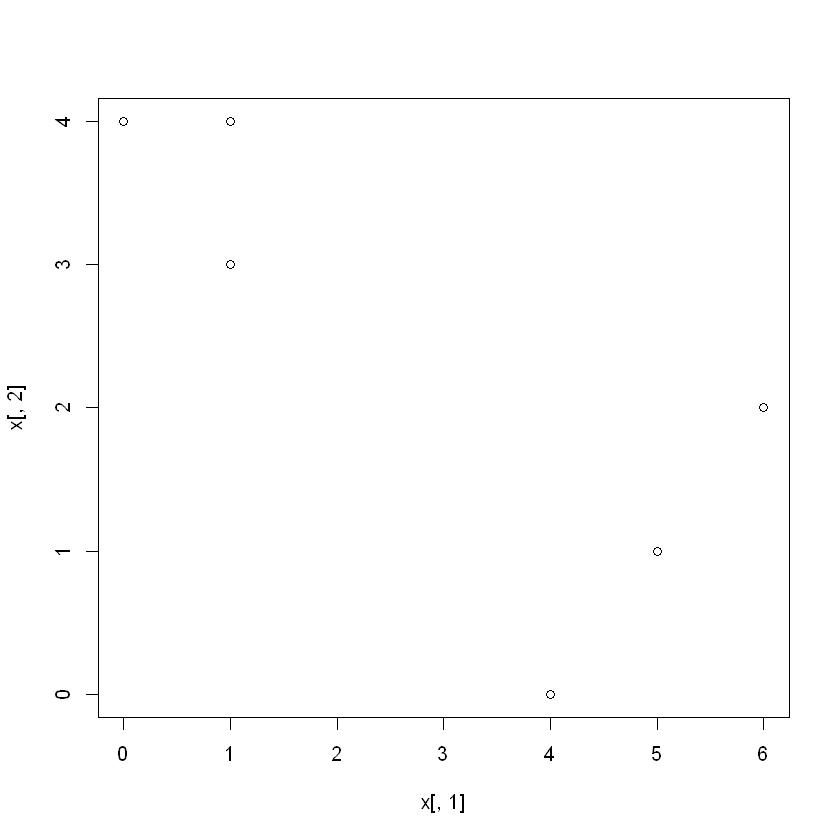

In [1]:
#a.
x <- cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
plot(x[,1], x[,2])

In [2]:
set.seed(2)
labels <- sample(2, nrow(x), replace = T)
labels

[1] 1 1 2 2 2 2

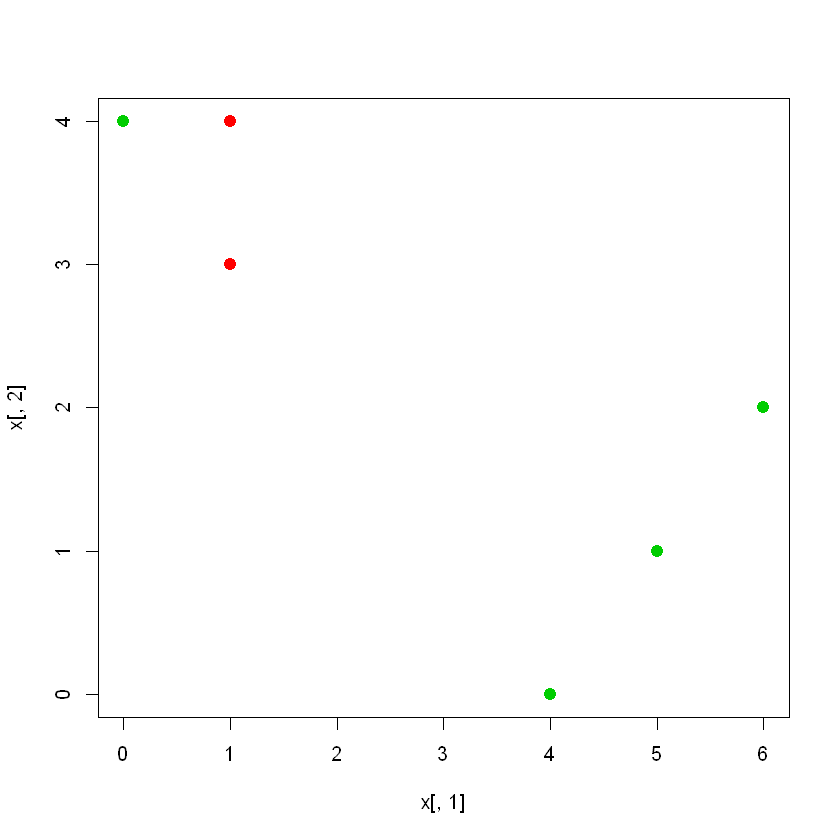

In [3]:
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)

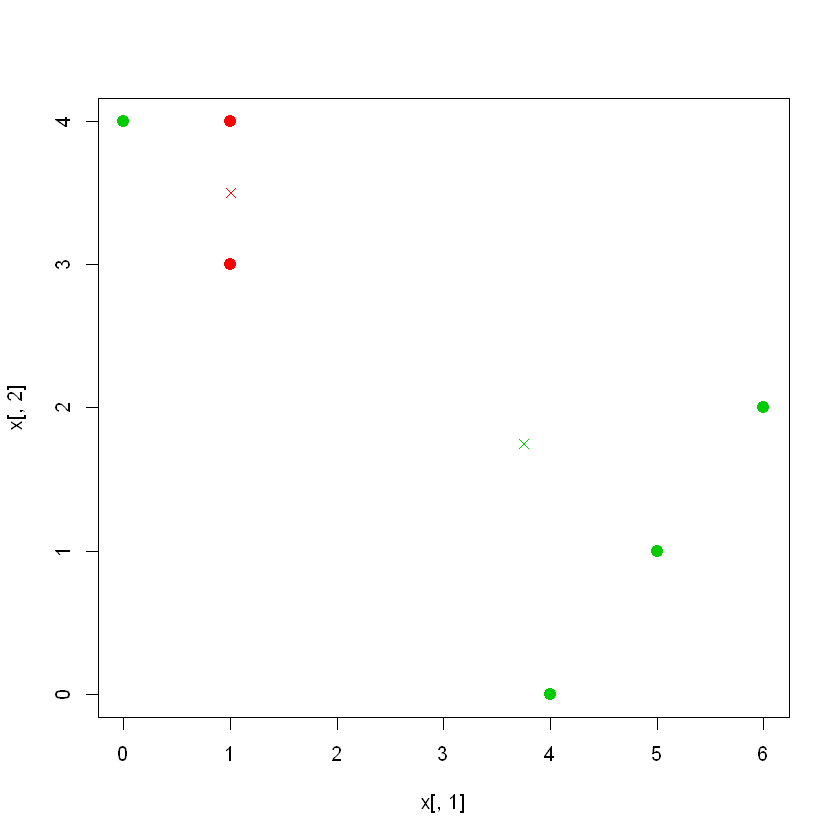

In [4]:
#c. 
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

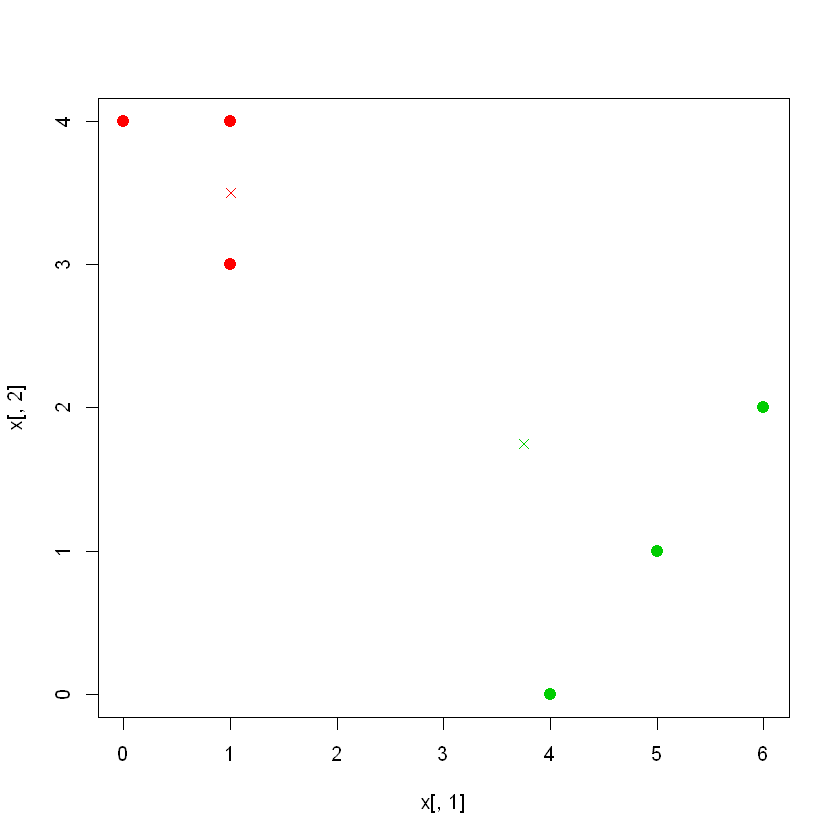

In [6]:
#d.
labels <- c(1, 1, 1, 2, 2, 2)
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

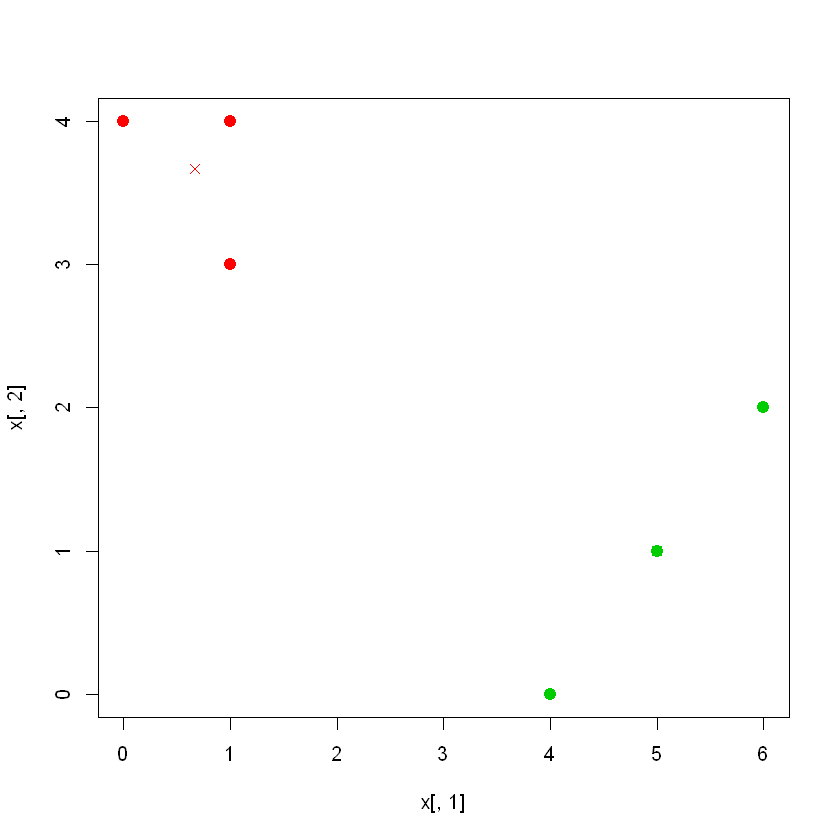

In [7]:
#e.
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

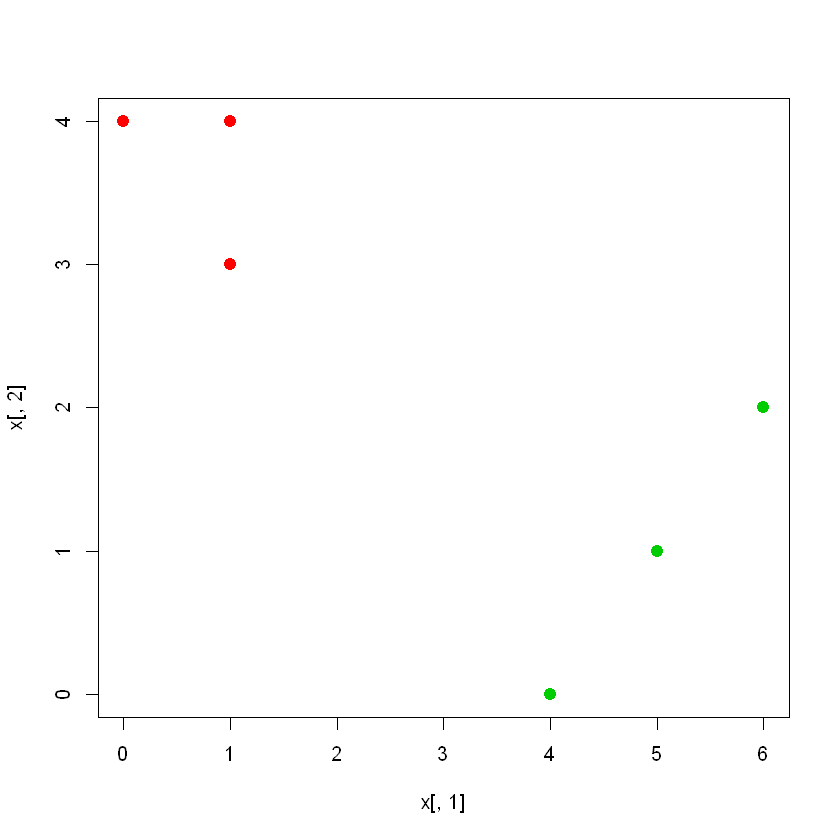

In [8]:
#f.
plot(x[, 1], x[, 2], col=(labels + 1), pch = 20, cex = 2)

## Ex. 8

In [9]:
#a.
pr.out <- prcomp(USArrests, scale = TRUE)
pr.var <- pr.out$sdev^2
pve <- pr.var / sum(pr.var)
sum(pr.var)

[1] 4

In [11]:
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [12]:
#b.
loadings <- pr.out$rotation
USArrests2 <- scale(USArrests)
sumvar <- sum(apply(as.matrix(USArrests2)^2, 2, sum))
apply((as.matrix(USArrests2) %*% loadings)^2, 2, sum) / sumvar

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

## Ex. 9

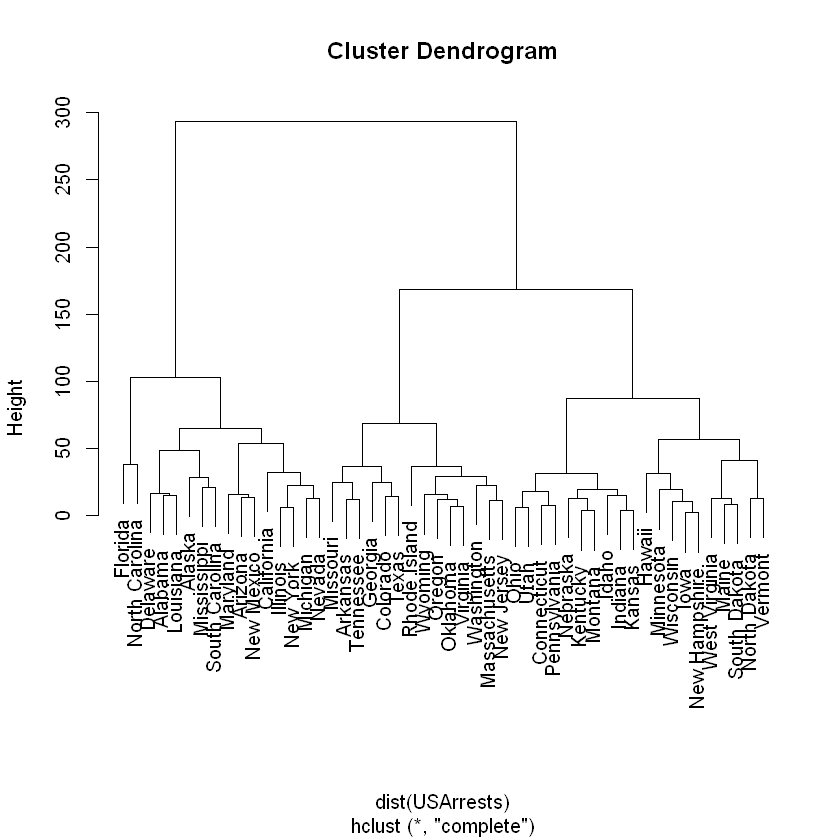

In [13]:
#a.
set.seed(2)
hc.complete <- hclust(dist(USArrests), method = "complete")
plot(hc.complete)

In [14]:
#b.
cutree(hc.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

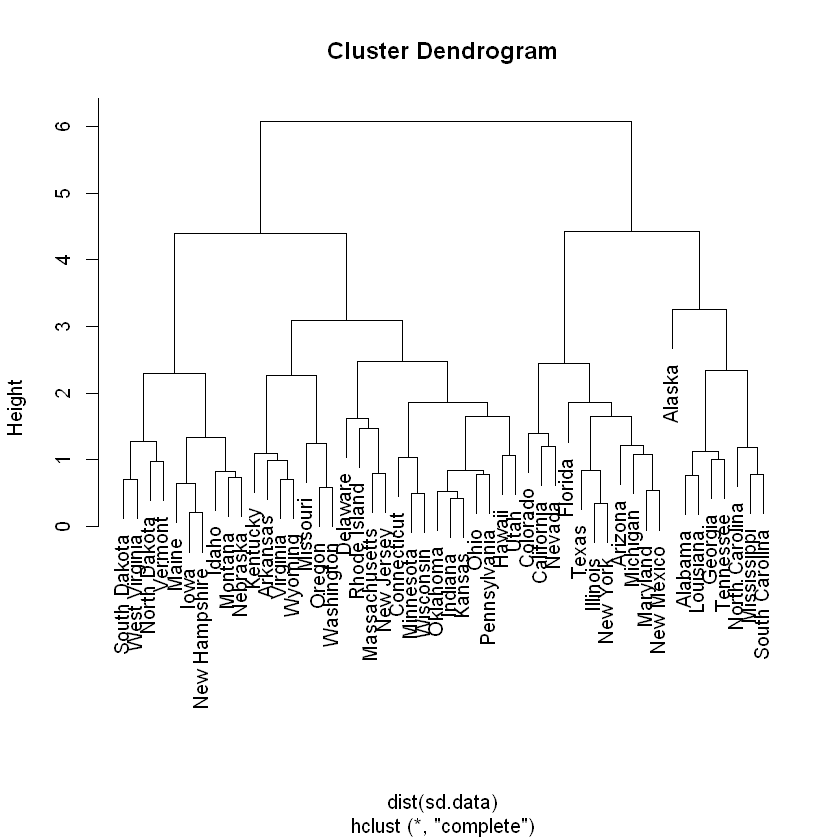

In [15]:
#c.
sd.data <- scale(USArrests)
hc.complete.sd <- hclust(dist(sd.data), method = "complete")
plot(hc.complete.sd)

In [16]:
#d.
cutree(hc.complete.sd, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [17]:
table(cutree(hc.complete, 3), cutree(hc.complete.sd, 3))

   
     1  2  3
  1  6  9  1
  2  2  2 10
  3  0  0 20

## Ex. 10

In [20]:
#a.
set.seed(2)
x <- matrix(rnorm(20 * 3 * 50, mean = 0, sd = 0.001), ncol = 50)
x[1:20, 2] <- 1
x[21:40, 1] <- 2
x[21:40, 2] <- 2
x[41:60, 1] <- 1
true.labels <- c(rep(1, 20), rep(2, 20), rep(3, 20))

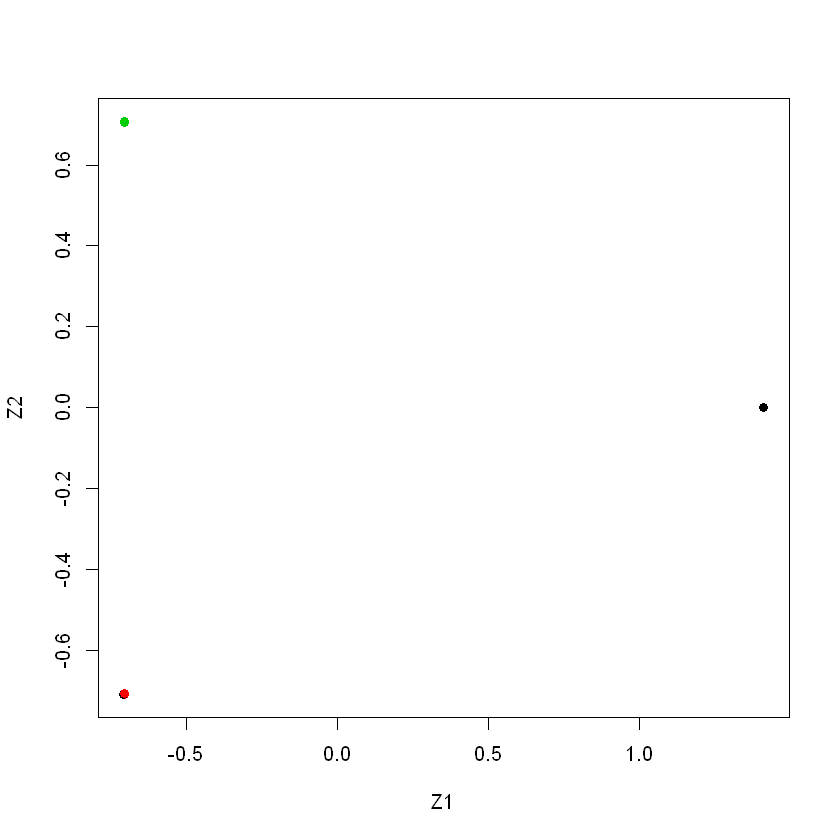

In [21]:
#b.
pr.out <- prcomp(x)
plot(pr.out$x[, 1:2], col = 1:3, xlab = "Z1", ylab = "Z2", pch = 19)

In [24]:
#c.
km.out <- kmeans(x, 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1 20  0  0
          2  0  0 20
          3  0 20  0

So we reached a good clustering, as observations are spread in equal amount among the 3 clusters.

In [25]:
#d. By putting K=2
km.out <- kmeans(x, 2, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2
          1 20  0
          2  0 20
          3 20  0

So the 2 clusters are now covering the amount of observations clustered.

In [26]:
#e.
km.out <- kmeans(x, 4, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3  4
          1  0 11  0  9
          2 20  0  0  0
          3  0  0 20  0

So a cluster is now divided over 2.

In [27]:
#f.
km.out <- kmeans(scale(x), 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1  9  9  2
          2  0  2 18
          3 12  7  1

Scaling really matters in clustering, as it influences directly the distances over observations, which represent the base for the clustering algorithm.